# 1.3 Visualizing Variables

You've probably heard the expression, "A picture is worth a thousand words." This is true in data science as well. A graphic usually conveys more information (and more efficiently) than a few summary statistics. In this section, you will learn how to produce graphics for quantitative and categorical variables.

If you've made graphics in Python before, then you might know that by default, Python outputs graphics to a new window. But what if we want a record of the graphic? We could save the graphic to an image file, but then the graphic and the code that generated it would reside in different files and could get separated. This could be a problem later on if we want to re-generate the graphic. In other words, the standard Python workflow is sometimes not **reproducible**. We will have more to say about reproducibility throughout this book.

The Jupyter notebook contributes to a reproducible workflow by allowing us to embed graphics directly in the notebook. Now, the graphic and the code that generated it live in the same file, adjacent to one another. To make graphics show up in the Jupyter notebook, we have to specify that `matplotlib` (the main graphics library in Python) should output the graphic to the "inline" backend, as opposed to, for example, a backend that would make the graphic appear in a new window. To do this, we execute something called a **magic command**. Magic commands modify the behavior of the notebook and individual cells. For example, later in this book, we will use a magic command that determines the runtime of a cell.

The magic command below tells `matplotlib` to use the "inline" backend. In general, if you plan to create graphics in the Jupyter notebook, then the following magic should always be the first line in your notebook.

In [4]:
%matplotlib inline

Note that the line above is not valid Python code. The `%` character at the beginning of the line identifies a magic to the kernel that backs the Jupyter notebook.

In [5]:
import pandas as pd
df = pd.read_csv("../data/titanic.csv")

**Alex's Note**  Here is a list of links to the documentation for this notebook

* IPython (Jupyter's Python kernel)  built-in magic commands (commands that start with a "%"): https://ipython.readthedocs.io/en/stable/interactive/magics.html

* Pandas plotting (DataFrame level): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
* Pandas plotting (Series level): https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html
* Specific plot types:
    * Histograms: pandas.Series.plot.hist(): https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.hist.html
    * Density plots: pandas.Series.plot.density(): https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.density.html
    * Bar graphs: pandas.Series.plot.bar(): https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html
    * Pie charts: pandas.Series.plot.pie(): https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.pie.html
    * Horizontal bar graph: pandas.Series.plot.barh(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html
* Index sorting: pandas.Series.sort_index(): https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_index.html


## Visualizing Quantitative Variables

Graphics can help us understand how the values of a quantitative variable are distributed. We will look at two visualizations: histograms and bar graphs.

### Histograms

The standard visualization for a single quantitative variable is the **histogram**. A histogram sorts the values into bins and then uses bars to display how many values are in each bin.

To make a histogram, we call the `.plot.hist()` method of the selected variable. All of the plotting functions in `pandas` are preceded by `.plot`.

In [7]:
df.fare, df.fare.min(), df.fare.max()

(0       211.3375
 1       151.5500
 2       151.5500
 3       151.5500
 4       151.5500
           ...   
 1304     14.4542
 1305     14.4542
 1306      7.2250
 1307      7.2250
 1308      7.8750
 Name: fare, Length: 1309, dtype: float64,
 0.0,
 512.3292)

<AxesSubplot:title={'center':'Histogram of Titanic Fares'}, ylabel='Frequency'>

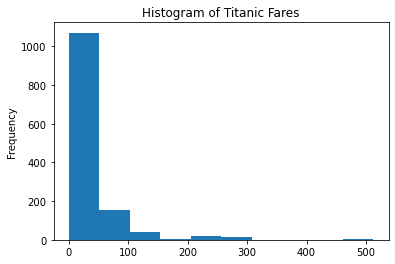

In [9]:
df.fare.plot.hist(title="Histogram of Titanic Fares")

It seems that we did not get enough resolution to really determine what is going on at the lower end of the scale. Let's ask for more bins.

<AxesSubplot:title={'center':'Distribution of Titanic Ticket Fares'}, ylabel='Frequency'>

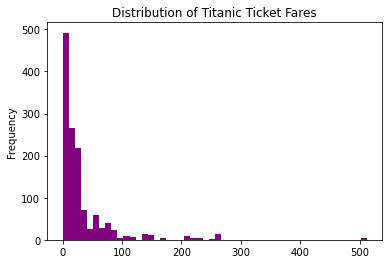

In [12]:
df.fare.plot.hist(bins=50, title ="Distribution of Titanic Ticket Fares", color="purple")

From this graph, we see a concentration of values around 10-30 (which we previously identified as the "center") and a spread of about 30-50 (which we previously identified as the "spread"). We also see the outlier who paid more than £500. We also see features that were not obvious before: the skewed shape of the distribution, the gap between £300 and £500, and so on. This single picture has managed to convey more information than a dozen summary statistics.

We might want to plot more than one histogram on the same graphic to make for easy comparison. To do this, we simply make multiple calls to `.plot` functions within the same cell. For example, if we wanted to compare the distributions of the number of siblings/spouses and the number of parents/children that accompanied passengers, we could call `.plot.hist()` twice.

<AxesSubplot:ylabel='Frequency'>

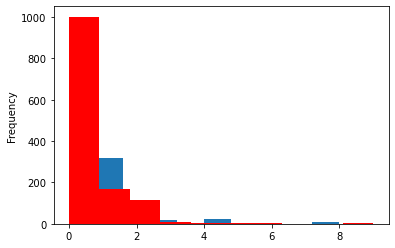

In [14]:
df.sibsp.plot.hist()
df.parch.plot.hist(color = "red")

Notice that `pandas` automatically plotted the two histograms in different colors. There are two problems with this plot. First, we don't know which color corresponds to which variable. Second, we cannot see the blue histogram underneath the orange histogram because the colors are opaque.

To solve the first problem, we add a legend for each variable by specifying `legend=True`. To solve the second problem, we set the transparency level `alpha`, which is a number between 0 and 1. Try varying `alpha` to get a feel for what it does.

<AxesSubplot:title={'center':'Comparison of histograms'}, ylabel='Frequency'>

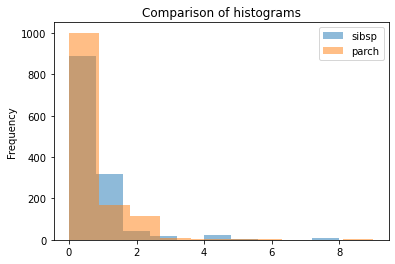

In [18]:
df.sibsp.plot.hist( alpha=.5, title="Comparison of histograms", legend=True)
df.parch.plot.hist( alpha=.5, legend=True)

The parents/children histogram is higher at 0 and 2, but the sibling/spouse histogram is higher at 1. This makes sense because

1. There were many childless couples on the Titanic (i.e., 0 children).
2. You can only have 1 spouse, but many children will travel with 2 parents.

### Densities

Another way to visualize the distribution of a quantitative variable is by its **density**. A density plot turns the jagged histogram into a smooth curve, allowing the user to focus on the general shape.

<AxesSubplot:ylabel='Density'>

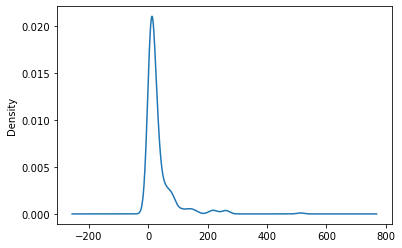

In [19]:
df.fare.plot.density()

The x-axis is too wide. (You cannot have negative fares.) We can set the limits of the x-axis manually using the `xlim` argument.

**Alex's Note:** the meaning of this plot is not immediately easy to see, so let's give it a title.

<AxesSubplot:title={'center':'Density of Titanic Fares'}, ylabel='Density'>

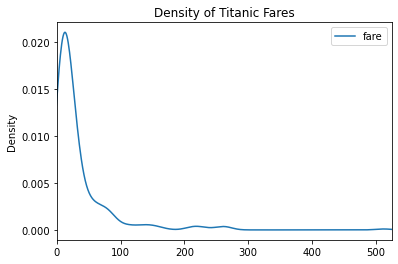

In [22]:
df.fare.plot.density(xlim=(0, 525),title ="Density of Titanic Fares", legend = True)

Let's try plotting this density on top of the histogram, by making

<AxesSubplot:ylabel='Density'>

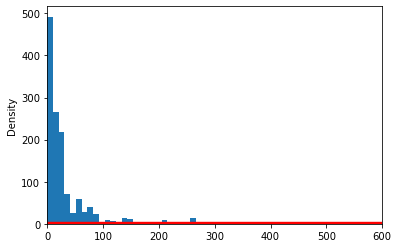

In [26]:
df.fare.plot.hist(bins=50)
df.fare.plot.density(xlim=(0, 600), color="red", lw=4)

If you squint at the plot, you will see an orange line at the bottom of the plot. This is supposed to be the density. But why does it look like a flat line? The y-axis offers a hint. When we made the density plot earlier, the y-axis extended from 0 to about 0.02. Now the y-axis extends all the way to 500. On this scale, a curve that ranges from 0 to 0.02 will appear to be a flat line!

The problem is that the histogram and the density are currently on different scales. By default, histograms display counts, while densities are defined so that the total area under the curve is 1. To be able to display a histogram and density on the same graph, we have to normalize the histogram so that the total area of the bars is 1. We can do this by setting the option `density=True`.  

We also want to make our line more visible. To this extent, we color it red using `color="red"` parameter, and make it thicker using `lw=4` parameter ("lw" = "line width")


<AxesSubplot:ylabel='Density'>

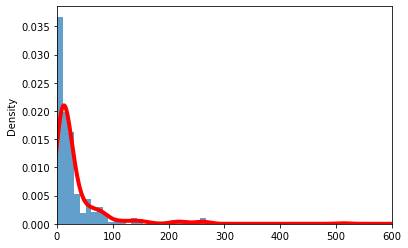

In [27]:
df.fare.plot.hist(bins=50, density=True, alpha=0.7)
df.fare.plot.density(xlim=(0, 600), color="red",  lw=4)

**Alex's Note:** Finally, before looking at what this graph is like, we can alter the shape of the plot itself using the `figsize` parameter. The values are in inches by default, so the plot below is supposed to be rendered as a 10 inch by 10 inch square.


<AxesSubplot:ylabel='Density'>

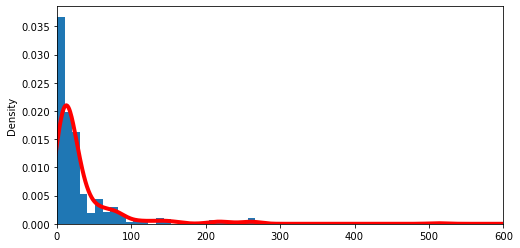

In [32]:
df.fare.plot.hist(bins=50, density=True, figsize=(8,4))
df.fare.plot.density(xlim=(0, 600), color="red",  lw=4)

Now we can clearly see how the density smooths the histogram. It does a pretty good job for the most part, but it "oversmooths" near 0, missing the spike.

You might wonder what other options are available besides `legend`, `alpha`, `bins`, `normed`, and `xlim`. Let's look at the documentation for `.plot.hist()`.

In [33]:
df.fare.plot.hist?

Signature: df.fare.plot.hist(by=None, bins=10, **kwargs)
Docstring:
Draw one histogram of the DataFrame's columns.

A histogram is a representation of the distribution of data.
This function groups the values of all given Series in the DataFrame
into bins and draws all bins in one :class:`matplotlib.axes.Axes`.
This is useful when the DataFrame's Series are in a similar scale.

Parameters
----------
by : str or sequence, optional
    Column in the DataFrame to group by.
bins : int, default 10
    Number of histogram bins to be used.
**kwargs
    Additional keyword arguments are documented in
    :meth:`DataFrame.plot`.

Returns
-------
class:`matplotlib.AxesSubplot`
    Return a histogram plot.

See Also
--------
DataFrame.hist : Draw histograms per DataFrame's Series.
Series.hist : Draw a histogram with Series' data.

Examples
--------
When we draw a dice 6000 times, we expect to get each value around 1000
times. But when we draw two dices and sum the result, the distribution
is going

The documentation for `.plot.hist()` tells us about one option, `bins`, but then refers us to `.plot()` for more options. If you peek inside `.plot()`, you will find the `legend`, `normed`, and `xlim` options, as well as many others.

Try these out to get a feel for what they do. For example, can you figure out how to make the density red in the above graph? Or how to change the size of the figure?

Interestingly, `alpha` is not listed among the options above. That is because `alpha` is an option of the `matplotlib` plotting method that `pandas` calls. (Notice that the last argument of `.plot()` is `**kwds`, for "options to pass to matplotlib plotting method".) We will have more to say about plotting in `matplotlib` later in the book, not now.

## Visualizing Categorical Variables

To visualize a categorical variable, we simply need to represent the frequency of each category. We will focus on two types of visualizations for categorical variables: bar graphs and pie charts.

### Bar Graphs

In a **bar graph**, each bar represents a category, and the height of the bar represents the frequency of that category.

`pandas` does not produce a bar graph directly from a categorical variable. It assumes that the data is already in a `Series` whose index is the categories and whose values are the frequencies. This is exactly what we get when we call `.value_counts()` on a categorical variable. So to make a bar graph, we first calculate the frequencies using `.value_counts()`, then call `.plot.bar()` on these frequencies.

For example, here is a visualization showing how many passengers are in each class.

In [35]:
pclass_counts = df.pclass.value_counts()

In [39]:
pclass_counts.sort_index()
pclass_counts

3    709
1    323
2    277
Name: pclass, dtype: int64

<AxesSubplot:>

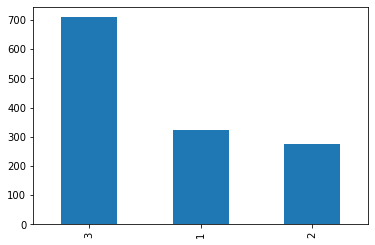

In [37]:

pclass_counts.plot.bar()

The bar graph makes it clear how many more 3rd class passengers there were than 1st and 2nd class passengers. Bar graphs make it easy to compare categories to each other.

Although bar graphs are superficially similar to histograms (they both have bars), they are not the same. The x-axis on a histogram is a numeric scale, but the x-axis on a bar graph is not, since a bar graph is used to represent categorical variables and the categories are often unordered. For this reason, the bars in a bar graph are typically separated by gaps, to emphasize that the bars do not fall on any particular scale. By contrast, a histogram will not have gaps between the bars, unless there is actually a gap in the data.

The bars in a bar graph are also not guaranteed to be ordered in any particular way. `pandas` will plot the bars in the same order as they appeared in the value counts. Since `.value_counts()` sorts the values by frequency, the bar graph was sorted in the same order.

In the case of the passenger class, we probably want the bars in the order 1st, 2nd, 3rd. To do this, we can sort the index of the value counts before passing them to `.plot.bar()`.

1    323
2    277
3    709
Name: pclass, dtype: int64

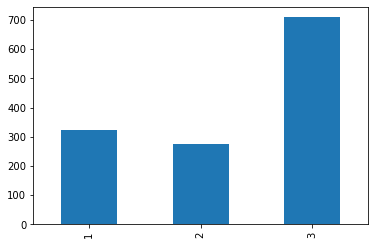

In [40]:
pclass_counts.sort_index(inplace=True)


pclass_counts.plot.bar()
pclass_counts

The graphic is sometimes easier to read if the bars are horizontal instead of vertical. For example, when the labels are long, arranging the bars horizontally allow the labels to be printed left-to-right instead of down-to-up. To make horizontal bars, just add an `h` to the end of `.plot.bar`:

<AxesSubplot:>

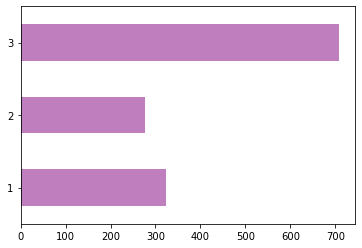

In [42]:
pclass_counts.plot.barh(color="purple", alpha = 0.5)

### Pie Charts

Pie charts are another way to visualize a categorical variable. Whereas bar graphs make it easy to compare categories to each other, pie charts make it easy to compare a category to the whole.

<AxesSubplot:title={'center':'Pie Chart'}, ylabel='pclass'>

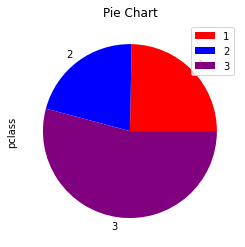

In [48]:
pclass_counts.plot.pie(legend=True, title ="Pie Chart", colors=["red","blue", "purple"])

It is immediately obvious from this pie chart that 3rd class passengers made up more than half of all passengers on the Titanic. Determining this from the bar graph would have required more mental exertion on the part of the reader.

Again, you can use tab completion to discover more plots that you can make using `pandas`. Not all of the available functions are suitable for categorical variables (for example, `.plot.hist()` is not).

# Exercises

All of the following exercises use the Tips data set (`../data/tips.csv`).

In [65]:
tipsDF = pd.read_csv("../data/tips.csv")
tipsDF

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

**Exercise 1.** Make a graphic that shows the distribution of total bills. Explain what you see.

In [ ]:
# YOUR CODE HERE

**Text of explanations**: 

**Exercise 2.** Make a graphic that shows the number of parties this waiter served on each day of the week. Try to make sure your graphic has the days of the week in the right order, starting from Sunday.

In [ ]:
# YOUR CODE HERE

**Exercise 3.** The `.plot.box()` command makes a box plot. A box plot is another way to visualize the distribution of a quantitative variable. Make a box plot of the total bills. Which summary statistics can you read off from this graphic? (You may want to refresh your memory about [how box plots are made](http://www.physics.csbsju.edu/stats/box2.html).)

In [ ]:
# YOUR CODE HERE

**Exercise 4.** What happens when you call `.plot.pie()` on a quantitative variable, like `tip`? Why does the pie chart look this way? Do you think pie charts are appropriate for quantitative variables?

In [ ]:
# YOUR CODE HERE

**Exercise 5.** Make a graphic that shows the distribution of party sizes served by the waiter.

In [ ]:
# YOUR CODE HERE

**Exercise 6** Compare the distribution of bill amounts and the tip amounts on the same graph. Can you make the graphic that you create look good?

In [66]:
# YOUR CODE HERE

**Submission Instructions**

Submit this notebook using the following `handin` command:

        handin dekhtyar 301-lab04 <File>